### Cleaning of data

In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import seaborn as sns

In [159]:
sns.set_style('darkgrid')
colors = ['#1565c0', '#862C92', '#00BCD4', '#2196f3','#64b5f6', '#90caf9', '#bbdefb', '#004173']
sns.set_palette(colors)

In [160]:
bank_df = pd.read_csv('bank_marketing.csv')
bank_df.head()

,client_id,age,job,marital,education,credit_default,mortgage,month,day,contact_duration,number_contacts,previous_campaign_contacts,previous_outcome,cons_price_idx,euribor_three_months,campaign_outcome
0,0,56,housemaid,married,basic.4y,no,no,may,13,261,1,0,nonexistent,93.994,4.857,no
1,1,57,services,married,high.school,unknown,no,may,19,149,1,0,nonexistent,93.994,4.857,no
2,2,37,services,married,high.school,no,yes,may,23,226,1,0,nonexistent,93.994,4.857,no
3,3,40,admin.,married,basic.6y,no,no,may,27,151,1,0,nonexistent,93.994,4.857,no
4,4,56,services,married,high.school,no,no,may,3,307,1,0,nonexistent,93.994,4.857,no


In [161]:
bank_df.dtypes

client_id                       int64
age                             int64
job                            object
marital                        object
education                      object
credit_default                 object
mortgage                       object
month                          object
day                             int64
contact_duration                int64
number_contacts                 int64
previous_campaign_contacts      int64
previous_outcome               object
cons_price_idx                float64
euribor_three_months          float64
campaign_outcome               object
dtype: object

In [162]:
for col in ['credit_default', 'mortgage', 'previous_outcome', 'campaign_outcome']:
    print('---------------------------')
    print(bank_df[col].value_counts())

---------------------------
credit_default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64
---------------------------
mortgage
yes        21576
no         18622
unknown      990
Name: count, dtype: int64
---------------------------
previous_outcome
nonexistent    35563
failure         4252
success         1373
Name: count, dtype: int64
---------------------------
campaign_outcome
no     36548
yes     4640
Name: count, dtype: int64


In [ ]:
# Replacing the columns values
columns_replace = ['credit_default','mortgage','previous_outcome','campaign_outcome']

for col in columns_replace:
    bank_df[col] = bank_df[col].astype(str)
    
replace_dict = {'yes':1, 'unknown':0,'no':0,'success':1,'failure':0,'nonexistent':0}

for col in columns_replace:
    bank_df[col] = bank_df[col].replace(replace_dict)

for col in columns_replace:
    bank_df[col] = bank_df[col].astype(int)

In [164]:
# Converting to bool values
for col in ['credit_default', 'mortgage', 'previous_outcome', 'campaign_outcome']:
    bank_df[col] = bank_df[col].astype(bool)

In [165]:
# Changing the values in job and education column
bank_df['job'] = bank_df['job'].str.replace(".", "_")

bank_df['education'] = bank_df['education'].str.replace(".", "_")
bank_df['education'] = bank_df['education'].replace("unknown", np.nan)

assert 'unknown' not in bank_df['education'].values

In [ ]:
# Replacing month column in numbers
bank_df['month'] = bank_df['month'].replace({
    'may':5, 'jul':7, 'aug':8, 'jun':6, 'nov':11, 'apr':4, 'oct':10, 'sep':9, 'mar':3, 'dec':12}).astype(int)

# Creating year column
bank_df['year'] = 2022

# Converting year, month and day column in string
bank_df['month'] = bank_df['month'].astype(str)
bank_df['year'] = bank_df['year'].astype(str)
bank_df['day'] = bank_df['day'].astype(str)

# Creating last contact date column
bank_df['last_contact_date'] = pd.to_datetime(bank_df['year'] + '-' + bank_df['month'] + '-' + bank_df['day'])

In [167]:
client_df = bank_df[['client_id','age','job','marital','education','credit_default','mortgage']]
campaign_df = bank_df[['client_id','number_contacts','contact_duration','previous_campaign_contacts',\
'previous_outcome','campaign_outcome','last_contact_date']]
economics_df = bank_df[['client_id','cons_price_idx','euribor_three_months']]

In [168]:
client = client_df.to_csv("client_df.csv", index=False)
campaign = campaign_df.to_csv("campaign_df.csv", index=False)
economics = economics_df.to_csv("economics.csv", index=False)

In [169]:
# Dataframe of client
client_df.head()

,client_id,age,job,marital,education,credit_default,mortgage
0,0,56,housemaid,married,basic_4y,False,False
1,1,57,services,married,high_school,False,False
2,2,37,services,married,high_school,False,True
3,3,40,admin_,married,basic_6y,False,False
4,4,56,services,married,high_school,False,False


In [170]:
# Dataframe of campaign
campaign_df.head()

,client_id,number_contacts,contact_duration,previous_campaign_contacts,previous_outcome,campaign_outcome,last_contact_date
0,0,1,261,0,False,False,2022-05-13
1,1,1,149,0,False,False,2022-05-19
2,2,1,226,0,False,False,2022-05-23
3,3,1,151,0,False,False,2022-05-27
4,4,1,307,0,False,False,2022-05-03


In [171]:
# Dataframe of economics
economics_df.head()

,client_id,cons_price_idx,euribor_three_months
0,0,93.994,4.857
1,1,93.994,4.857
2,2,93.994,4.857
3,3,93.994,4.857
4,4,93.994,4.857


### Analysis

#### 1. Customer profiles

In [172]:
# Credit default by job 
credits_defaults = client_df[client_df['credit_default'] == True]
job_credits_default = credits_defaults['job'].value_counts()
job_credits_default

job
technician    2
unemployed    1
Name: count, dtype: int64

In [173]:
# Credits awarded by job 
credits_granted = client_df[client_df['credit_default'] == False]
job_credits_granted = credits_granted['job'].value_counts()
job_credits_granted

job
admin_           10422
blue-collar       9254
technician        6741
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1013
student            875
unknown            330
Name: count, dtype: int64

In [174]:
client_df['age'].unique()

array([56, 57, 37, 40, 45, 59, 41, 24, 25, 29, 35, 54, 46, 50, 39, 30, 55,
       49, 34, 52, 58, 32, 38, 44, 42, 60, 53, 47, 51, 48, 33, 31, 43, 36,
       28, 27, 26, 22, 23, 20, 21, 61, 19, 18, 70, 66, 76, 67, 73, 88, 95,
       77, 68, 75, 63, 80, 62, 65, 72, 82, 64, 71, 69, 78, 85, 79, 83, 81,
       74, 17, 87, 91, 86, 98, 94, 84, 92, 89])

In [ ]:
# Creating a new age range column
ranges = [17, 30, 50, 70, np.inf]
group_names = ['17-30', '31-50', '51-70', '71+']

client_df.loc[:, 'age_range'] = pd.cut(client_df['age'], bins=ranges, labels=group_names, right=True, include_lowest=True)
client_df

In [176]:
# Credit default by age
age_credits_default = credits_defaults['age'].value_counts()
age_credits_default

age
48    2
31    1
Name: count, dtype: int64

In [177]:
# Credit default by age range
age_range_credits_default = client_df.loc[client_df['credit_default'] == True, 'age_range'].value_counts()
age_range_credits_default

age_range
31-50    3
17-30    0
51-70    0
71+      0
Name: count, dtype: int64

In [178]:
# Credits awarded by age
age_credits_granted = credits_granted['age'].value_counts()
age_credits_granted

age
31    1946
32    1846
33    1833
36    1780
35    1759
      ... 
91       2
98       2
95       1
87       1
94       1
Name: count, Length: 78, dtype: int64

In [179]:
# Credit default by age range
age_range_credits_awarded = client_df.loc[client_df['credit_default'] == False, 'age_range'].value_counts()
age_range_credits_awarded

age_range
31-50    26622
17-30     7383
51-70     6758
71+        422
Name: count, dtype: int64

In [180]:
# Credit default by marital status
marital_credits_default = credits_defaults['marital'].value_counts()
marital_credits_default

marital
married    3
Name: count, dtype: int64

In [181]:
# Credits awarded by marital status
marital_credits_granted = credits_granted['marital'].value_counts()
marital_credits_granted

marital
married     24925
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64

In [182]:
# Credit default by education
education_credits_default = credits_defaults['education'].value_counts()
education_credits_default

education
professional_course    2
high_school            1
Name: count, dtype: int64

In [183]:
# Credits awarded by education
education_credits_granted = credits_granted['education'].value_counts()
education_credits_granted

education
university_degree      12168
high_school             9514
basic_9y                6045
professional_course     5241
basic_4y                4176
basic_6y                2292
illiterate                18
Name: count, dtype: int64

In [184]:
# Credit default and mortage
mortgage_credits_default = credits_defaults['mortgage'].value_counts()
mortgage_credits_default

mortgage
False    2
True     1
Name: count, dtype: int64

In [185]:
# Credits awarded and mortgage
mortgage_credits_granted = credits_granted['mortgage'].value_counts()
mortgage_credits_granted

mortgage
True     21575
False    19610
Name: count, dtype: int64

In [186]:
# Job and credits
job_credit_counts = (client_df.groupby(['job','credit_default']).size().reset_index(name='count'))
job_credit_counts

,job,credit_default,count
0,admin_,False,10422
1,blue-collar,False,9254
2,entrepreneur,False,1456
3,housemaid,False,1060
4,management,False,2924
5,retired,False,1720
6,self-employed,False,1421
7,services,False,3969
8,student,False,875
9,technician,False,6741


In [187]:
# Job and credits
age_credit_counts = (client_df.groupby(['age_range','credit_default'], observed=True).size().reset_index(name='count'))
age_credit_counts

,age_range,credit_default,count
0,17-30,False,7383
1,31-50,False,26622
2,31-50,True,3
3,51-70,False,6758
4,71+,False,422


In [188]:
# Marital status and credits
marital_credits_count = (client_df.groupby(['marital','credit_default']).size().reset_index(name='count'))
marital_credits_count

,marital,credit_default,count
0,divorced,False,4612
1,married,False,24925
2,married,True,3
3,single,False,11568
4,unknown,False,80


In [189]:
# Education and credits
education_credit_count = (client_df.groupby(['education','credit_default']).size().reset_index(name='count'))
education_credit_count

,education,credit_default,count
0,basic_4y,False,4176
1,basic_6y,False,2292
2,basic_9y,False,6045
3,high_school,False,9514
4,high_school,True,1
5,illiterate,False,18
6,professional_course,False,5241
7,professional_course,True,2
8,university_degree,False,12168


In [190]:
# Mortgage and credits
mortgage_credit_count = (client_df.groupby(['mortgage','credit_default']).size().reset_index(name='count'))
mortgage_credit_count

,mortgage,credit_default,count
0,False,False,19610
1,False,True,2
2,True,False,21575
3,True,True,1


### Visualization of Profile Customers

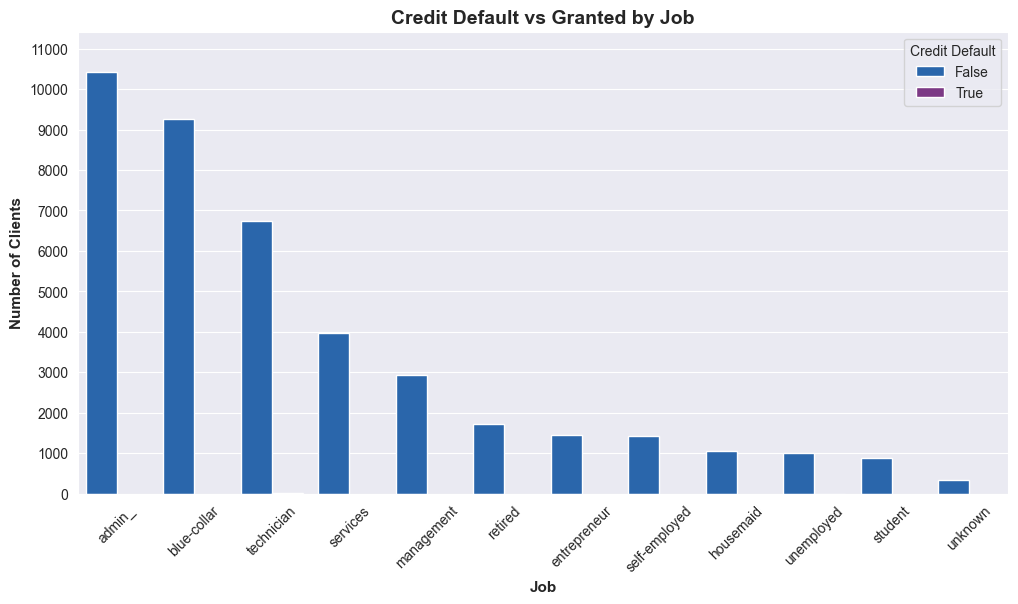

In [191]:
# Graphic job and credit
plt.figure(figsize=(12,6))
sns.barplot(data=job_credit_counts.sort_values(by='count', ascending=False), x='job', y='count', hue='credit_default')
plt.title("Credit Default vs Granted by Job", fontsize=14, weight="bold")
plt.xlabel("Job", fontsize=11, weight="bold")
plt.xticks(rotation=45)
plt.ylabel("Number of Clients", fontsize=11, weight="bold")
# Ranges of axis "Y"
plt.gca().yaxis.set_major_locator(MultipleLocator(1000)) # step by 1000
plt.ylim(0,job_credit_counts['count'].max()+1000)
plt.legend(title="Credit Default")
plt.show()

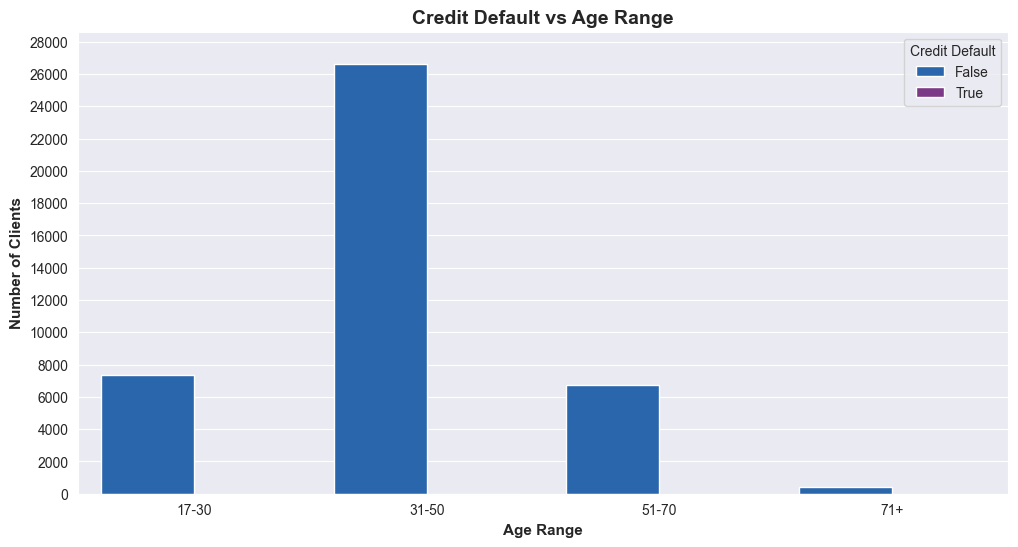

In [192]:
# Graphic age range and credit
plt.figure(figsize=(12,6))
sns.barplot(data=age_credit_counts, x='age_range', y='count', hue='credit_default')
plt.title("Credit Default vs Age Range", fontsize=14, weight="bold")
plt.xlabel("Age Range", fontsize=11, weight="bold")
plt.ylabel("Number of Clients", fontsize=11, weight="bold")
# Ranges of axis "Y"
plt.gca().yaxis.set_major_locator(MultipleLocator(2000))
plt.ylim(0,age_credit_counts['count'].max()+2000)
plt.legend(title="Credit Default")
plt.show()

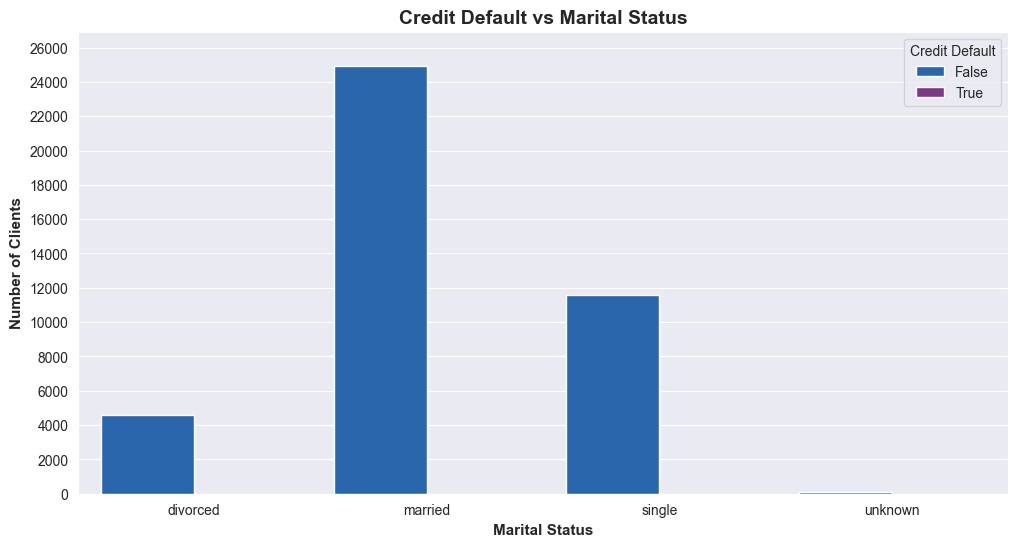

In [193]:
# Graphic marital status and credit
plt.figure(figsize=(12,6))
sns.barplot(data=marital_credits_count, x='marital', y='count', hue='credit_default')
plt.title("Credit Default vs Marital Status", fontsize=14, weight="bold")
plt.xlabel("Marital Status", fontsize=11, weight="bold")
plt.ylabel("Number of Clients", fontsize=11, weight="bold")
# Ranges of axis "Y"
plt.gca().yaxis.set_major_locator(MultipleLocator(2000))
plt.ylim(0,marital_credits_count['count'].max()+2000)
plt.legend(title="Credit Default")
plt.show()

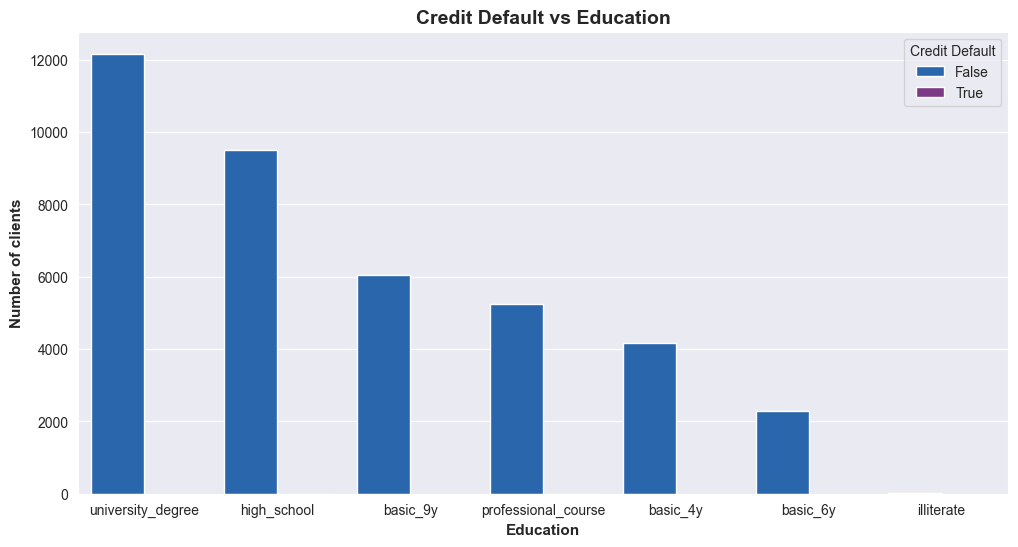

In [194]:
# Graphic education and credit
plt.figure(figsize=(12,6))
sns.barplot(data=education_credit_count.sort_values(by='count', ascending=False), x='education', y='count', hue='credit_default') #Sort by count
plt.title("Credit Default vs Education", fontsize=14, weight="bold")
plt.xlabel("Education", fontsize=11, weight="bold")
plt.ylabel("Number of clients", fontsize=11, weight="bold")
#plt.gca().yaxis.set_major_locator(MultipleLocator(2000))
#plt.ylim(0,education_credit_count['count'].max() + 2000)
plt.legend(title='Credit Default')
plt.show()

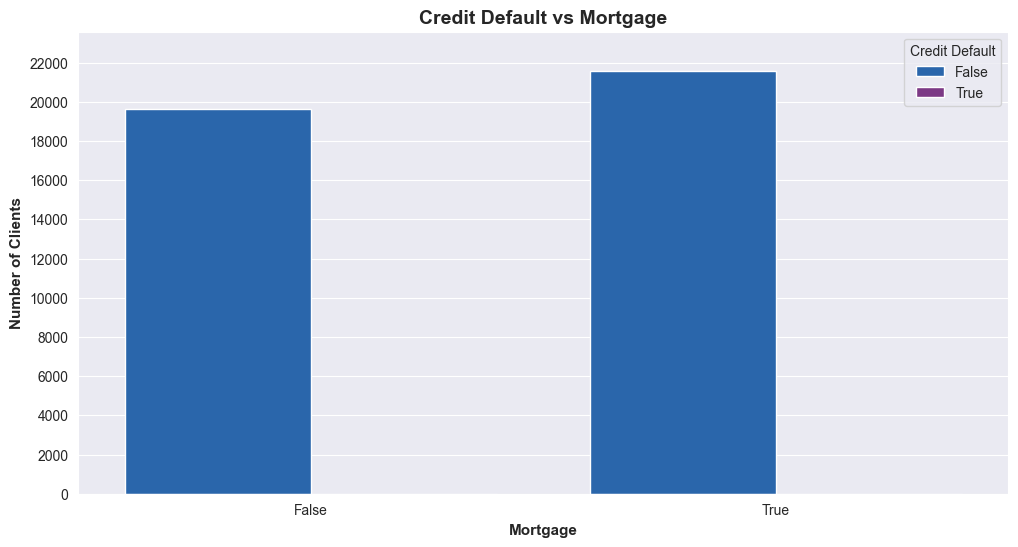

In [195]:
# Graphic mortgage and credit
plt.figure(figsize=(12,6))
sns.barplot(data=mortgage_credit_count, x='mortgage', y='count', hue='credit_default')
plt.title("Credit Default vs Mortgage", fontsize=14, weight="bold")
plt.xlabel("Mortgage", fontsize=11, weight="bold")
plt.ylabel("Number of Clients", fontsize=11, weight="bold")
# Ranges of axis "Y"
plt.gca().yaxis.set_major_locator(MultipleLocator(2000))
plt.ylim(0,mortgage_credit_count['count'].max()+2000)
plt.legend(title="Credit Default")
plt.show()